<a href="https://colab.research.google.com/github/janasteinborn/MAT-421/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAT 421 Homework 6

Name: Jana Steinborn

# Continuity and Differentiation

A function is continuous at a point if the limit exists and equals the function's value at that point. Differentiation measures the rate of change of a function.

### Example: Checking Continuity and Differentiability

We will analyze the function:

\[ f(x) = \begin{cases}
x^2, & x < 1 \\
2x - 1, & x \geq 1
\end{cases} \]

We will check if the function is continuous and differentiable at \( x = 1 \).

Left-hand limit at x=1: 1
Right-hand limit at x=1: 1
Function values at x=1: 1, 1
Left-hand derivative at x=1: 2
Right-hand derivative at x=1: 2


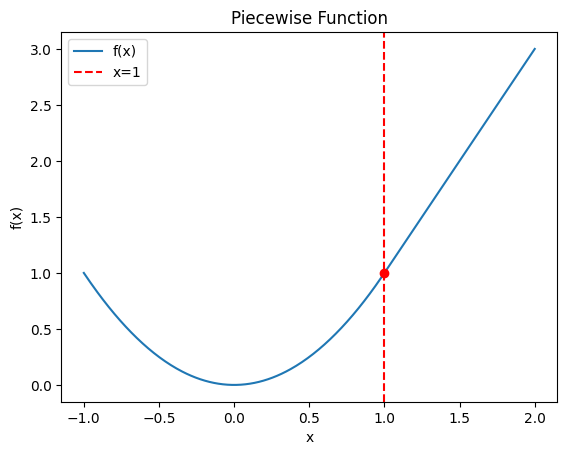

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define the piecewise function
x = sp.symbols('x')
f1 = x**2  # For x < 1
f2 = 2*x - 1  # For x >= 1

# Compute left-hand and right-hand limits
lim_left = sp.limit(f1, x, 1)
lim_right = sp.limit(f2, x, 1)
f1_at_1 = f1.subs(x, 1)
f2_at_1 = f2.subs(x, 1)

# Compute derivatives
df1 = sp.diff(f1, x)
df2 = sp.diff(f2, x)

# Compute left-hand and right-hand derivatives at x = 1
df1_at_1 = df1.subs(x, 1)
df2_at_1 = df2.subs(x, 1)

# Display results
print(f"Left-hand limit at x=1: {lim_left}")
print(f"Right-hand limit at x=1: {lim_right}")
print(f"Function values at x=1: {f1_at_1}, {f2_at_1}")
print(f"Left-hand derivative at x=1: {df1_at_1}")
print(f"Right-hand derivative at x=1: {df2_at_1}")

# Plot the function
x_vals = np.linspace(-1, 2, 400)
y_vals = [xi**2 if xi < 1 else 2*xi - 1 for xi in x_vals]

plt.plot(x_vals, y_vals, label="f(x)")
plt.axvline(1, color='r', linestyle='--', label="x=1")
plt.scatter([1], [f2_at_1], color='red', zorder=3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Piecewise Function")
plt.show()

# Taylor Theorem

Taylor's theorem approximates functions using polynomials. We will approximate \( f(x) = e^x \) around \( x = 0 \) using its Taylor series expansion.

The Taylor series for \( e^x \) around \( x = 0 \) is:

$[ e^x \approx 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dots ]$

Taylor Series Expansion of e^x around x=0:
 4    3    2        
x    x    x         
── + ── + ── + x + 1
24   6    2         


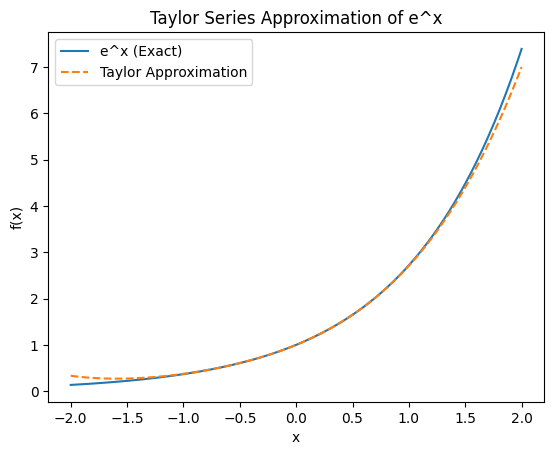

In [7]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define function and its expansion
x = sp.symbols('x')
f = sp.exp(x)
taylor_expansion = sp.series(f, x, 0, 5).removeO()

# Print the Taylor Series Expansion
print("Taylor Series Expansion of e^x around x=0:")
sp.pprint(taylor_expansion)

# Plot the function and its Taylor approximation
x_vals = np.linspace(-2, 2, 400)
y_exact = np.exp(x_vals)
y_approx = 1 + x_vals + (x_vals**2)/2 + (x_vals**3)/6 + (x_vals**4)/24  # 4th-degree Taylor approximation

plt.plot(x_vals, y_exact, label="e^x (Exact)")
plt.plot(x_vals, y_approx, '--', label="Taylor Approximation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Taylor Series Approximation of e^x")
plt.show()

# Optimization with Gradient Descent

Gradient descent is used to find the minimum of a function. We will minimize:

$[ f(x) = x^4 - 3x^3 + 2 ]$

using gradient descent.


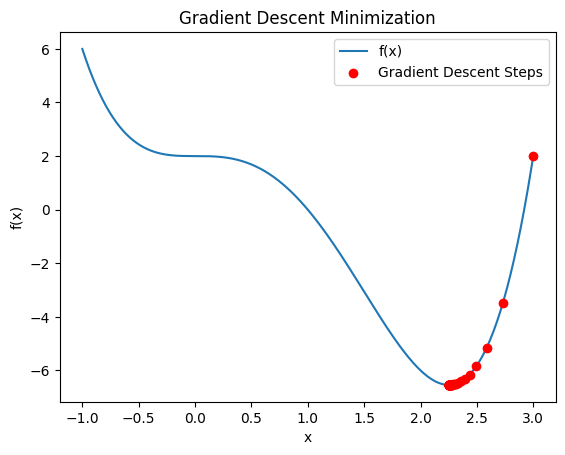

Minimum found at x ≈ 2.250005, f(x) ≈ -6.542969


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return x**4 - 3*x**3 + 2

def df(x):
    return 4*x**3 - 9*x**2

# Gradient Descent Algorithm
learning_rate = 0.01
x_current = 3  # Starting point
tolerance = 1e-6
max_iters = 1000

x_vals = [x_current]

for _ in range(max_iters):
    x_next = x_current - learning_rate * df(x_current)
    if abs(x_next - x_current) < tolerance:
        break
    x_current = x_next
    x_vals.append(x_current)

# Plot results
x_range = np.linspace(-1, 3, 400)
y_range = f(x_range)

plt.plot(x_range, y_range, label="f(x)")
plt.scatter(x_vals, [f(x) for x in x_vals], color='red', zorder=3, label="Gradient Descent Steps")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Gradient Descent Minimization")
plt.show()

print(f"Minimum found at x ≈ {x_current:.6f}, f(x) ≈ {f(x_current):.6f}")